<a href="https://colab.research.google.com/github/ronnyboi/Data_Analytics/blob/main/Program%208%20-%20Clustering/Ron_Program_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

Apply K-means algorithm on the attached datasets (1. faithful.csv and 2. Mall_Customers.csv). Use elbow method to decide the number of clusters. Visualize wherever it is needed.


# **Mall Customers Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


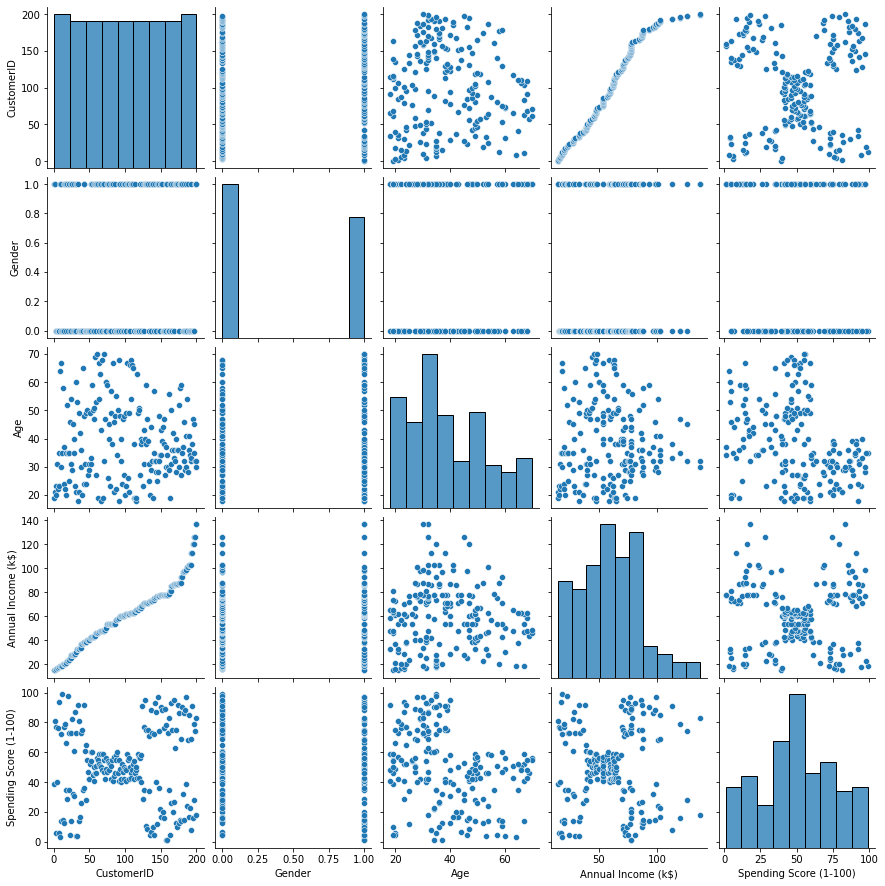

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
x = df[["Age","Spending Score (1-100)"]].values
print(df.shape)

(200, 5)


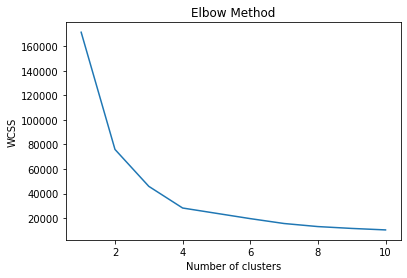

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans2.fit(x)
    wcss.append(kmeans2.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

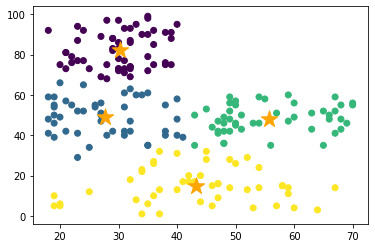

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(df[['Age','Spending Score (1-100)']])
Klabels = kmeans.predict(df[['Age','Spending Score (1-100)']])
centroids = kmeans.cluster_centers_
plt.scatter(df['Age'],df['Spending Score (1-100)'] ,c=Klabels,)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='orange', s=300)
plt.show()

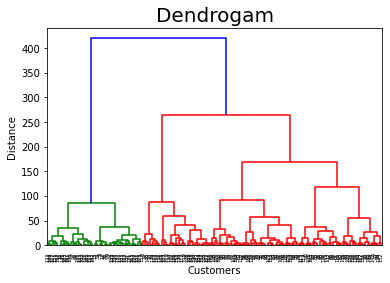

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [ ]:
y = df[["Annual Income (k$)","Spending Score (1-100)"]].values
print(df.shape)

(200, 5)


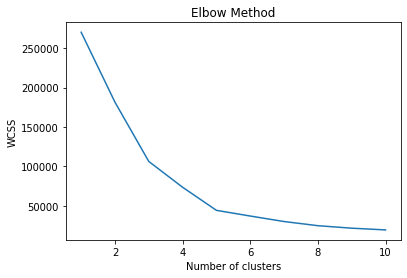

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans2.fit(y)
    wcss.append(kmeans2.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

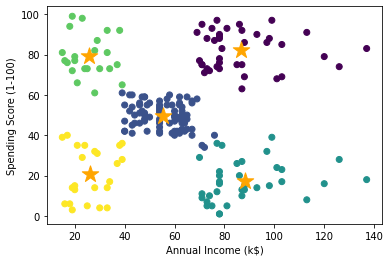

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
Klabels = kmeans.predict(df[['Annual Income (k$)','Spending Score (1-100)']])
centroids = kmeans.cluster_centers_
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'] ,c=Klabels,)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='orange', s=300)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# **Faithful Dataset**

In [ ]:
df = pd.read_csv('faithful.csv')
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [ ]:
df.isnull().sum()

Unnamed: 0    0
eruptions     0
waiting       0
dtype: int64

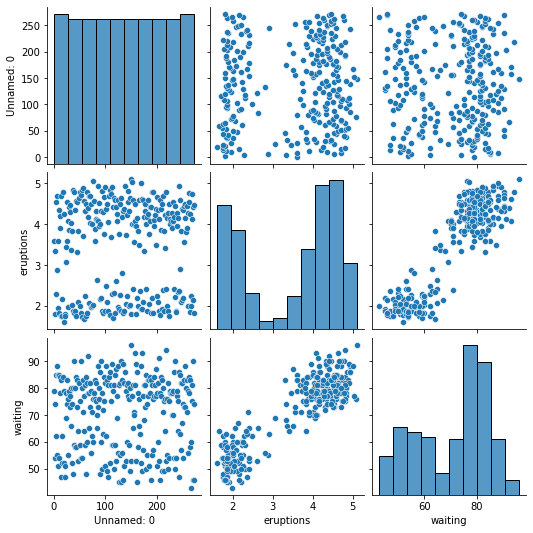

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
z = df[["eruptions","waiting"]].values
print(df.shape)

(272, 3)


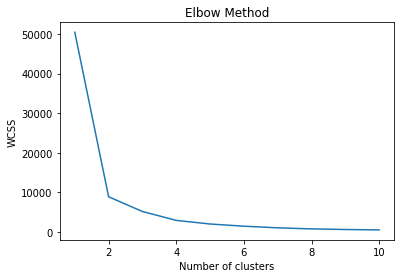

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans2.fit(z)
    wcss.append(kmeans2.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

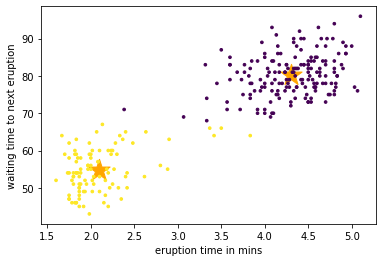

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(z)
labels = kmeans.predict(z)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='orange', s=500 )
plt.scatter(df['eruptions'], df['waiting'], c=labels+200, s=7)
plt.xlabel('eruption time in mins')
plt.ylabel('waiting time to next eruption')
plt.show()

In [ ]:
p = df[["Unnamed: 0","eruptions"]].values
print(df.shape)

(272, 3)


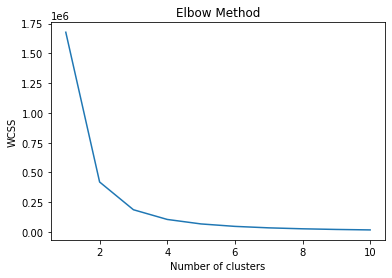

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans2.fit(p)
    wcss.append(kmeans2.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

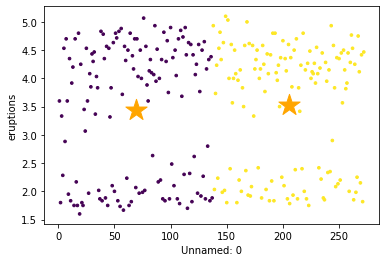

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(p)
labels = kmeans.predict(p)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='orange', s=500 )
plt.scatter(df['Unnamed: 0'], df['eruptions'], c=labels+200, s=7)
plt.xlabel('Unnamed: 0')
plt.ylabel('eruptions')
plt.show()